In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/ML_Lab/cancer_data.csv"

In [3]:
import pandas as pd

df = pd.read_csv(file_path)
df.head()

,Id,WBC_area,WBC_convex_area,WBC_peri,ecc_wbc,solidity_wbc,orient_wbc,nuc_area,nuc_ratio,peri_nuc,...,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,entropy_cyt,minoraxis,majoraxis,minoraxis_nuc,majoraxis_nuc,axismeanratio,Diagnosis
0,1,10073,10170,397.525,0.471852,0.990462,84.266745,7670,0.761441,344.139,...,130.713275,123.667915,145.271328,-29.556808,108.497299,123.057794,90.427364,108.957290,1.718868,M
1,2,450,450,83.916,0.866025,1.000000,0.000000,204,0.453333,82.255,...,115.975610,67.243902,140.126016,-3.650864,17.320508,34.641016,14.005658,26.951812,1.586649,B
2,3,10349,10506,413.412,0.211948,0.985056,-7.032837,8092,0.781911,327.046,...,135.955693,129.935312,144.863093,-25.080685,116.237091,118.939275,100.504110,102.755103,1.728577,M
3,4,10827,10862,401.949,0.215046,0.996778,-56.467459,8326,0.769003,355.255,...,131.139544,122.655338,143.148741,-29.023241,118.451811,121.289517,102.269262,104.048451,1.721235,M
4,5,3421,3470,247.499,0.884772,0.985879,-7.053928,2582,0.754750,217.886,...,150.808105,142.667461,176.097735,-15.562377,46.218970,99.177380,41.875873,85.638339,1.769519,M


# M -> 0
# B -> 1

In [4]:
df["Diagnosis"] = df["Diagnosis"].map({
    "M" : 0,
    "B" : 1
})

df.head()

,Id,WBC_area,WBC_convex_area,WBC_peri,ecc_wbc,solidity_wbc,orient_wbc,nuc_area,nuc_ratio,peri_nuc,...,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,entropy_cyt,minoraxis,majoraxis,minoraxis_nuc,majoraxis_nuc,axismeanratio,Diagnosis
0,1,10073,10170,397.525,0.471852,0.990462,84.266745,7670,0.761441,344.139,...,130.713275,123.667915,145.271328,-29.556808,108.497299,123.057794,90.427364,108.957290,1.718868,0
1,2,450,450,83.916,0.866025,1.000000,0.000000,204,0.453333,82.255,...,115.975610,67.243902,140.126016,-3.650864,17.320508,34.641016,14.005658,26.951812,1.586649,1
2,3,10349,10506,413.412,0.211948,0.985056,-7.032837,8092,0.781911,327.046,...,135.955693,129.935312,144.863093,-25.080685,116.237091,118.939275,100.504110,102.755103,1.728577,0
3,4,10827,10862,401.949,0.215046,0.996778,-56.467459,8326,0.769003,355.255,...,131.139544,122.655338,143.148741,-29.023241,118.451811,121.289517,102.269262,104.048451,1.721235,0
4,5,3421,3470,247.499,0.884772,0.985879,-7.053928,2582,0.754750,217.886,...,150.808105,142.667461,176.097735,-15.562377,46.218970,99.177380,41.875873,85.638339,1.769519,0


In [6]:
X = df.drop(["Id", "Diagnosis"], axis = 1)
y = df["Diagnosis"]

In [7]:
X.head()

,WBC_area,WBC_convex_area,WBC_peri,ecc_wbc,solidity_wbc,orient_wbc,nuc_area,nuc_ratio,peri_nuc,round_nuc,...,convex_area_nuc,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,entropy_cyt,minoraxis,majoraxis,minoraxis_nuc,majoraxis_nuc,axismeanratio
0,10073,10170,397.525,0.471852,0.990462,84.266745,7670,0.761441,344.139,0.813837,...,7930,130.713275,123.667915,145.271328,-29.556808,108.497299,123.057794,90.427364,108.957290,1.718868
1,450,450,83.916,0.866025,1.000000,0.000000,204,0.453333,82.255,0.378892,...,312,115.975610,67.243902,140.126016,-3.650864,17.320508,34.641016,14.005658,26.951812,1.586649
2,10349,10506,413.412,0.211948,0.985056,-7.032837,8092,0.781911,327.046,0.950710,...,8232,135.955693,129.935312,144.863093,-25.080685,116.237091,118.939275,100.504110,102.755103,1.728577
3,10827,10862,401.949,0.215046,0.996778,-56.467459,8326,0.769003,355.255,0.829022,...,8593,131.139544,122.655338,143.148741,-29.023241,118.451811,121.289517,102.269262,104.048451,1.721235
4,3421,3470,247.499,0.884772,0.985879,-7.053928,2582,0.754750,217.886,0.683451,...,2627,150.808105,142.667461,176.097735,-15.562377,46.218970,99.177380,41.875873,85.638339,1.769519


In [8]:
y[:5]

,Diagnosis
0,0
1,1
2,0
3,0
4,0


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.50646876,  0.50563813,  0.57847107, -0.32554849,  0.32610164,
         1.57434138,  0.60431151,  0.55413699,  0.38118481,  0.76924137,
        -0.00870345,  0.62792245,  0.52283796,  0.11932716,  0.48010193,
         0.00374397, -0.57973783,  0.58951251,  0.44448733,  0.58443297,
         0.46098038,  0.01613218],
       [-1.64036804, -1.65215377, -2.19642359,  1.19705509,  1.19385378,
        -0.04969887, -1.67023463, -2.46503116, -2.18063568, -1.41101276,
         1.02468555, -2.17735424, -1.6839212 , -0.83297784, -1.60644022,
        -0.26215721,  1.88422366, -1.77574438, -2.40979872, -1.88035557,
        -2.37037199, -2.14807013],
       [ 0.5680428 ,  0.58022847,  0.71904341, -1.32950221, -0.16573308,
        -0.18524   ,  0.73287546,  0.75472184,  0.21397644,  1.45534607,
        -1.22743701,  0.76918661,  0.61032041,  0.45807695,  0.71186829,
        -0.01735294, -0.15400562,  0.79029383,  0.31153257,  0.90943286,
         0.24684131,  0.17504083],
       [ 0.67468189

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_scaled, y)

LinearRegression()

In [12]:
linear_reg_score = linear_reg.score(X_scaled, y)
linear_reg_score

1.0

In [14]:
predictions = linear_reg.predict(X_scaled)
predicted_values = []

for pred in predictions:
  if pred > 0.5:
    predicted_values.append("B")
  else:
    predicted_values.append("M")

predicted_values

['M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B']

In [15]:
actual_value = y.apply(lambda x: "B" if x == 1 else "M")
actual_value.to_list()

['M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B']

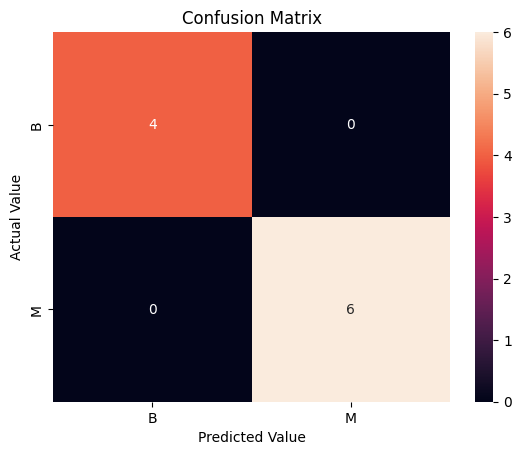

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(actual_value, predicted_values)
sns.heatmap(cm, annot = True, xticklabels = ["B", "M"], yticklabels = ["B", "M"])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix")
plt.show()

In [22]:
cm

array([[4, 0],
       [0, 6]])

## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_scaled, y)

GaussianNB()

In [25]:
naive_bayes_score = naive_bayes.score(X_scaled, y)
naive_bayes_score

0.9

## Decision Tree Classifier

In [26]:
X

,WBC_area,WBC_convex_area,WBC_peri,ecc_wbc,solidity_wbc,orient_wbc,nuc_area,nuc_ratio,peri_nuc,round_nuc,...,convex_area_nuc,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,entropy_cyt,minoraxis,majoraxis,minoraxis_nuc,majoraxis_nuc,axismeanratio
0,10073,10170,397.525,0.471852,0.990462,84.266745,7670,0.761441,344.139,0.813837,...,7930,130.713275,123.667915,145.271328,-29.556808,108.497299,123.057794,90.427364,108.957290,1.718868
1,450,450,83.916,0.866025,1.000000,0.000000,204,0.453333,82.255,0.378892,...,312,115.975610,67.243902,140.126016,-3.650864,17.320508,34.641016,14.005658,26.951812,1.586649
2,10349,10506,413.412,0.211948,0.985056,-7.032837,8092,0.781911,327.046,0.950710,...,8232,135.955693,129.935312,144.863093,-25.080685,116.237091,118.939275,100.504110,102.755103,1.728577
3,10827,10862,401.949,0.215046,0.996778,-56.467459,8326,0.769003,355.255,0.829022,...,8593,131.139544,122.655338,143.148741,-29.023241,118.451811,121.289517,102.269262,104.048451,1.721235
4,3421,3470,247.499,0.884772,0.985879,-7.053928,2582,0.754750,217.886,0.683451,...,2627,150.808105,142.667461,176.097735,-15.562377,46.218970,99.177380,41.875873,85.638339,1.769519
5,9994,10131,387.535,0.396667,0.986477,42.123770,6968,0.697218,426.405,0.477784,...,8086,130.945142,91.728024,147.307336,-27.676933,110.133878,119.976460,96.100735,100.578608,1.710901
6,4497,4680,268.613,0.420730,0.960897,-58.870669,2682,0.596398,301.457,0.370867,...,3701,90.649587,58.960331,96.546006,-19.739489,73.175352,80.661909,67.075376,69.182689,1.774326
7,2614,2680,238.873,0.950766,0.975373,2.824963,2138,0.817904,221.772,0.546266,...,2229,132.686975,126.090336,151.857143,-10.420173,32.992914,106.459875,29.519554,98.441245,1.819403
8,15374,15509,483.833,0.461606,0.991295,-61.212402,10647,0.692533,448.494,0.665157,...,11755,143.154220,131.805585,163.624921,-39.614050,134.159292,151.236103,99.870830,140.060139,1.670522
9,10429,10465,398.327,0.681893,0.996560,87.209121,7555,0.724422,327.012,0.887804,...,7786,126.637787,112.096381,143.146486,-34.290171,100.538430,137.450459,81.419218,119.443817,1.678827


In [27]:
y

,Diagnosis
0,0
1,1
2,0
3,0
4,0
5,1
6,1
7,0
8,0
9,1


In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)

DecisionTreeClassifier()

In [29]:
decision_tree_score = decision_tree.score(X,y)
decision_tree_score

1.0

## Logisitic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {"C" : [0.1,1,10]}

clf = GridSearchCV(estimator = LogisticRegression(max_iter = 1000), param_grid = param_grid, cv = 2)

clf.fit(X,y)

GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10]})

In [33]:
clf.best_params_

{'C': 0.1}

In [34]:
logistic_reg = LogisticRegression(C=1, max_iter=1000)
logistic_reg.fit(X,y)

LogisticRegression(C=1, max_iter=1000)

In [37]:
logistic_reg_score = logistic_reg.score(X, y)
logistic_reg_score

1.0

## MLP

In [65]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (64,32), activation = "relu", solver = "adam", max_iter = 200, random_state = 42)
mlp.fit(X_scaled,y)

MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42)

In [66]:
mlp_score = mlp.score(X_scaled,y)
mlp_score

1.0

## SVM

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C" : [0.1,1,10],
    "kernel" : ["rbf", "linear"]
}

clf = GridSearchCV(estimator = SVC(gamma = "auto"), param_grid = param_grid, cv = 2)
clf.fit(X_scaled, y)

GridSearchCV(cv=2, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']})

In [68]:
clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [69]:
svc = SVC(gamma = "auto", C = 0.1, kernel = "linear")
svc.fit(X_scaled, y)

SVC(C=0.1, gamma='auto', kernel='linear')

In [72]:
svc_score = svc.score(X_scaled, y)
svc_score

0.9